#Data Pre-Processing & EDA

In [30]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

# Additional Libraries
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('/content/Data/Train_Dataset.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0


In [32]:
#Shape of dataframe
print(" Shape of training dataframe: ", df.shape)

 Shape of training dataframe:  (121856, 40)


In [33]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [35]:
print(df.describe(include='all'))

                  ID Client_Income      Car_Owned     Bike_Owned  \
count   1.218560e+05        118249  118275.000000  118232.000000   
unique           NaN          1217            NaN            NaN   
top              NaN         13500            NaN            NaN   
freq             NaN         13717            NaN            NaN   
mean    1.216093e+07           NaN       0.342854       0.332262   
std     3.517694e+04           NaN       0.474665       0.471026   
min     1.210000e+07           NaN       0.000000       0.000000   
25%     1.213046e+07           NaN       0.000000       0.000000   
50%     1.216093e+07           NaN       0.000000       0.000000   
75%     1.219139e+07           NaN       1.000000       1.000000   
max     1.222186e+07           NaN       1.000000       1.000000   

          Active_Loan      House_Own    Child_Count Credit_Amount  \
count   118221.000000  118195.000000  118218.000000        118224   
unique            NaN            NaN         

In [36]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                            Missing Values  Percentage
ID                                       0    0.000000
Client_Income                         3607    2.960051
Car_Owned                             3581    2.938715
Bike_Owned                            3624    2.974002
Active_Loan                           3635    2.983029
House_Own                             3661    3.004366
Child_Count                           3638    2.985491
Credit_Amount                         3632    2.980567
Loan_Annuity                          4812    3.948923
Accompany_Client                      1746    1.432839
Client_Income_Type                    3701    3.037191
Client_Education                      3645    2.991236
Client_Marital_Status                 3473    2.850085
Client_Gender                         2413    1.980206
Loan_Contract_Type                    3651    2.996159
Client_Housing_Type                   3687    3.025702
Population_Region_Relative            4857    3.985852
Age_Days  

In [37]:
#check all the distinguished features of the dataset
df.select_dtypes(include='object').nunique()

,0
Client_Income,1217
Credit_Amount,4176
Loan_Annuity,10858
Accompany_Client,7
Client_Income_Type,8
Client_Education,5
Client_Marital_Status,4
Client_Gender,3
Loan_Contract_Type,2
Client_Housing_Type,6


In [38]:
class_df = df.groupby('Default').count()['ID'].reset_index().sort_values(by='ID',ascending=False)
class_df.style.background_gradient(cmap='winter')

,Default,ID
0,0,112011
1,1,9845


In [39]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print(numerical_columns.columns)

Index(['ID', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
       'Score_Source_2', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')


In [40]:
df.select_dtypes(include=['int64', 'float64']).nunique()

,0
ID,121856
Car_Owned,2
Bike_Owned,2
Active_Loan,2
House_Own,2
Child_Count,14
Own_House_Age,55
Mobile_Tag,2
Homephone_Tag,2
Workphone_Working,2


In [41]:
object_columns = df.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Client_Occupation',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_3'],
      dtype='object')


In [42]:
df.select_dtypes(include=['object']).nunique()

,0
Client_Income,1217
Credit_Amount,4176
Loan_Annuity,10858
Accompany_Client,7
Client_Income_Type,8
Client_Education,5
Client_Marital_Status,4
Client_Gender,3
Loan_Contract_Type,2
Client_Housing_Type,6


In [43]:
# Define the columns that need to be cleaned and converted
columns_to_clean_and_convert = {
    'Client_Income': 'float64',
    'Car_Owned': 'int64',
    'Bike_Owned': 'int64',
    'Active_Loan': 'int64',
    'House_Own': 'int64',
    'Child_Count': 'int64',
    'Credit_Amount': 'float64',
    'Loan_Annuity': 'float64',
    'Population_Region_Relative': 'float64',
    'Age_Days': 'int64',
    'Employed_Days': 'int64',
    'Registration_Days': 'int64',
    'ID_Days': 'int64',
    'Own_House_Age': 'int64',
    'Client_Family_Members': 'int64',
    'Cleint_City_Rating': 'int64',
    'Application_Process_Day': 'int64',
    'Application_Process_Hour': 'int64',
    'Score_Source_3': 'float64',
    'Social_Circle_Default': 'float64',
    'Phone_Change': 'int64',
    'Credit_Bureau': 'int64'
}

# Function to clean and convert to the specified data type
def clean_and_convert_column(df, column, target_dtype):
    # Remove non-numeric characters (except '.' and '-' for float values)
    df[column] = df[column].astype(str).str.replace('[^0-9.-]', '', regex=True)

    # Convert to the specified data type (float or int)
    if target_dtype == 'float64':
        df[column] = pd.to_numeric(df[column], errors='coerce')
    elif target_dtype == 'int64':
        # If converting to int, ensure it is first converted to numeric, then int64
        df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')  # Use 'Int64' to handle NaNs in integer columns

# Apply the cleaning and conversion process for each column
for column, dtype in columns_to_clean_and_convert.items():
    clean_and_convert_column(df, column, dtype)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  Int64  
 3   Bike_Owned                  118232 non-null  Int64  
 4   Active_Loan                 118221 non-null  Int64  
 5   House_Own                   118195 non-null  Int64  
 6   Child_Count                 118218 non-null  Int64  
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [44]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0,0,1,0,0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,<NA>,1,1,0,Sales,2,2,6,17,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63,<NA>,0
1,12138936,20250.0,1,0,1,<NA>,0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0,1,0,1,NaN,2,2,3,10,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,<NA>,<NA>,0
2,12181264,18000.0,0,0,1,0,1,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790,5102,<NA>,331,<NA>,1,0,0,Realty agents,2,2,4,<NA>,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277,0,0
3,12188929,15750.0,0,0,1,1,0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,<NA>,775,<NA>,1,0,0,NaN,2,3,2,15,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700,3,0
4,12133385,33750.0,1,0,1,0,2,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6,1,0,0,Laborers,4,1,3,<NA>,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674,1,0


In [45]:
df.describe()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,1.182340e+05,118275.0,118232.0,118221.0,118195.0,118218.0,118219.000000,117030.000000,116988.000000,118239.0,118190.0,118225.0,115871.0,41761.0,121856.000000,121856.000000,121856.000000,119446.0,119447.0,119428.0,118193.0,53021.000000,116170.000000,94934.000000,59928.000000,118192.0,103316.0,121856.000000
mean,1.216093e+07,1.686519e+04,0.342854,0.332262,0.499175,0.69206,0.417779,60046.488951,2721.254492,0.022602,16027.422948,67154.070615,4975.162123,2987.471015,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.0631,0.501213,0.518625,0.511180,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,1.153815e+04,0.474665,0.471026,0.500001,0.461644,0.728802,40350.663346,1461.466162,0.413617,4366.356504,138971.782951,3514.546963,1511.884576,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.194333,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,2.565000e+03,0.0,0.0,0.0,0.0,0.0,4500.000000,217.350000,0.000533,7676.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.014568,0.000005,0.000527,0.000000,0.0,0.0,0.000000
25%,1.213046e+07,1.125000e+04,0.0,0.0,0.0,0.0,0.0,27000.000000,1657.350000,0.010006,12398.0,932.0,2008.0,1705.0,5.0,1.000000,0.000000,0.000000,2.0,2.0,2.0,10.0,0.333481,0.390164,0.372334,0.057700,272.0,0.0,0.000000
50%,1.216093e+07,1.440000e+04,0.0,0.0,0.0,1.0,0.0,51750.000000,2499.750000,0.018850,15734.0,2212.0,4493.0,3242.0,9.0,1.000000,0.000000,0.000000,2.0,2.0,3.0,12.0,0.504657,0.564978,0.537070,0.088700,755.0,1.0,0.000000
75%,1.219139e+07,2.025000e+04,1.0,1.0,1.0,1.0,1.0,80865.000000,3466.800000,0.028663,19661.0,5634.0,7464.0,4295.0,15.0,1.000000,0.000000,1.000000,3.0,2.0,5.0,14.0,0.673890,0.664011,0.667458,0.148500,1570.0,3.0,0.000000
max,1.222186e+07,1.800009e+06,1.0,1.0,1.0,1.0,19.0,405000.000000,22500.000000,100.000000,25201.0,365243.0,23738.0,7197.0,69.0,1.000000,1.000000,1.000000,16.0,3.0,6.0,23.0,0.945741,100.000000,0.896010,1.000000,4185.0,22.0,1.000000


In [46]:
# Display the dimensions (number of rows and columns) of the DataFrame
df.shape

(121856, 40)

In [47]:
# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

0

<Axes: >

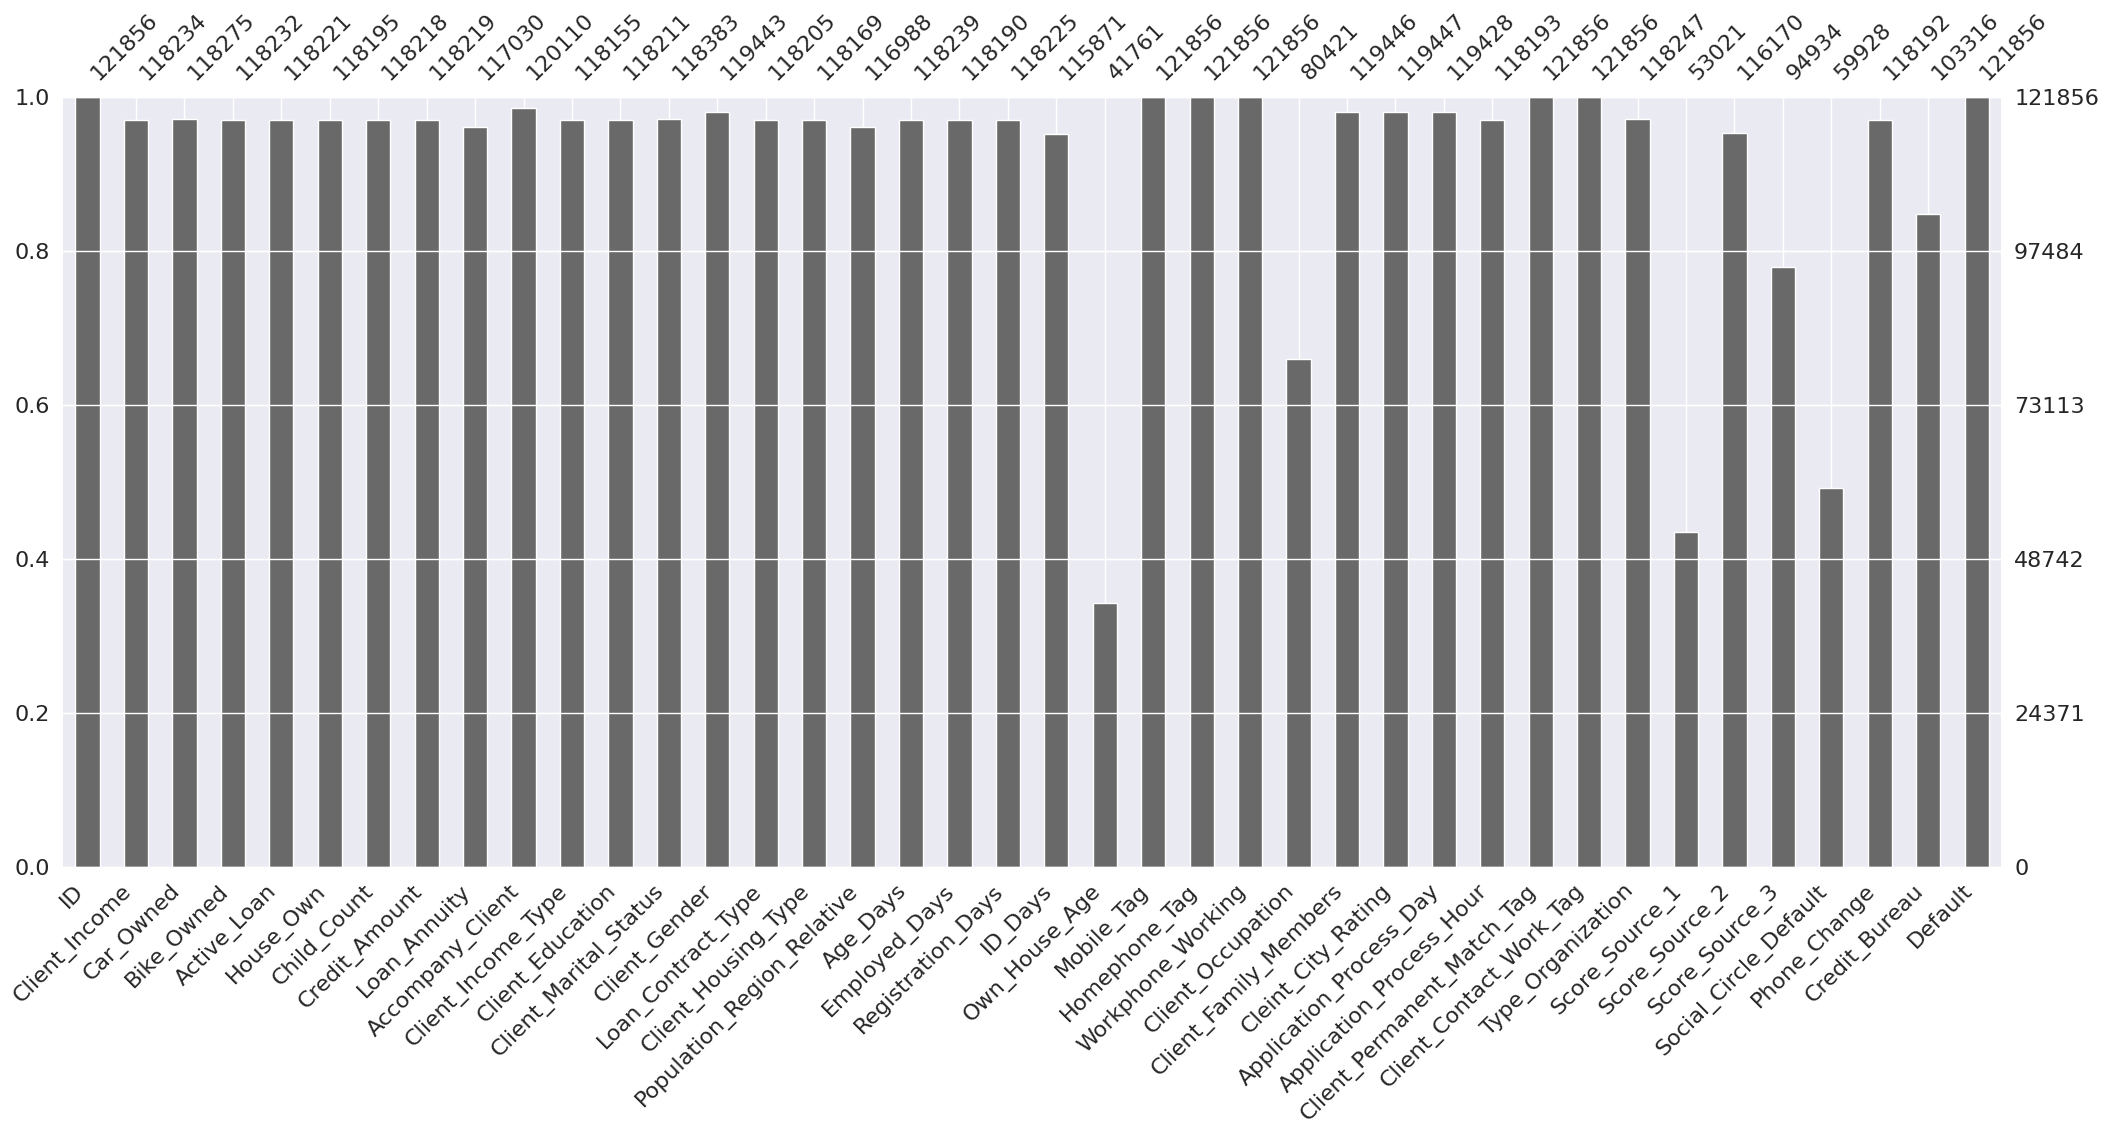

In [48]:
import missingno as msno
msno.bar(df)

In [49]:
#These columns exceed the 30% threshold, so you can use the following code to drop them
columns_to_drop = ['Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Social_Circle_Default']
df.drop(columns=columns_to_drop, inplace=True)

In [50]:
# List of columns to drop
manual_columns_to_drop = [
    'ID', 'Accompany_Client', 'Registration_Days',
    'Mobile_Tag', 'Homephone_Tag', 'Application_Process_Day',
    'Application_Process_Hour','Client_Permanent_Match_Tag','Client_Contact_Work_Tag', 'Type_Organization',
    'Score_Source_2', 'Score_Source_3',
    'Phone_Change','Credit_Bureau','Client_Housing_Type','Population_Region_Relative','ID_Days','Cleint_City_Rating'
]

# Drop the specified columns
df.drop(columns=manual_columns_to_drop, inplace=True)

In [51]:
# Display the dimensions (number of rows and columns) of the DataFrame
df.shape

(121856, 18)

In [52]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 5870


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Client_Income          118234 non-null  float64
 1   Car_Owned              118275 non-null  Int64  
 2   Bike_Owned             118232 non-null  Int64  
 3   Active_Loan            118221 non-null  Int64  
 4   House_Own              118195 non-null  Int64  
 5   Child_Count            118218 non-null  Int64  
 6   Credit_Amount          118219 non-null  float64
 7   Loan_Annuity           117030 non-null  float64
 8   Client_Income_Type     118155 non-null  object 
 9   Client_Education       118211 non-null  object 
 10  Client_Marital_Status  118383 non-null  object 
 11  Client_Gender          119443 non-null  object 
 12  Loan_Contract_Type     118205 non-null  object 
 13  Age_Days               118239 non-null  Int64  
 14  Employed_Days          118190 non-nu

In [54]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Workphone_Working,Client_Family_Members,Default
0,6750.0,0,0,1,0,0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,13957,1062,0,2,0
1,20250.0,1,0,1,<NA>,0,15282.00,1826.55,Service,Graduation,M,Male,CL,14162,4129,1,2,0
2,18000.0,0,0,1,0,1,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,16790,5102,0,2,0
3,15750.0,0,0,1,1,0,53870.40,2295.45,Retired,Secondary,M,Male,CL,23195,365243,0,2,0
4,33750.0,1,0,1,0,2,133988.40,3547.35,Commercial,Secondary,M,Female,CL,11366,2977,0,4,0


In [55]:
df.tail()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Workphone_Working,Client_Family_Members,Default
121851,29250.0,0,0,<NA>,1,0,107820.00,3165.30,Service,Secondary,M,Female,CL,12889,2863,0,2,1
121852,15750.0,0,1,1,0,0,104256.00,3388.05,Commercial,Graduation,M,Female,CL,8648,636,0,2,0
121853,8100.0,0,1,0,1,1,55107.90,2989.35,Govt Job,Secondary,M,Male,CL,9152,1623,0,3,0
121854,38250.0,1,1,0,1,0,45000.00,2719.35,Service,Graduation,M,Female,CL,10290,847,0,2,0
121855,9000.0,1,1,1,1,1,62428.95,4201.65,Commercial,Secondary,S,Male,CL,14772,498,0,2,0


In [56]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                    3622    2.972361
Car_Owned                        3581    2.938715
Bike_Owned                       3624    2.974002
Active_Loan                      3635    2.983029
House_Own                        3661    3.004366
Child_Count                      3638    2.985491
Credit_Amount                    3637    2.984670
Loan_Annuity                     4826    3.960412
Client_Income_Type               3701    3.037191
Client_Education                 3645    2.991236
Client_Marital_Status            3473    2.850085
Client_Gender                    2413    1.980206
Loan_Contract_Type               3651    2.996159
Age_Days                         3617    2.968258
Employed_Days                    3666    3.008469
Workphone_Working                   0    0.000000
Client_Family_Members            2410    1.977744
Default                             0    0.000000


In [57]:
# Step 1: Convert empty strings and cells with only `$` to NaN
df['Client_Income'] = df['Client_Income'].replace({'': pd.NA, '$': pd.NA})

# Step 2: Remove dollar signs and commas from valid numeric values
df['Client_Income'] = df['Client_Income'].replace({'\$': '', ',': ''}, regex=True)

# Step 3: Convert the column to numeric
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')

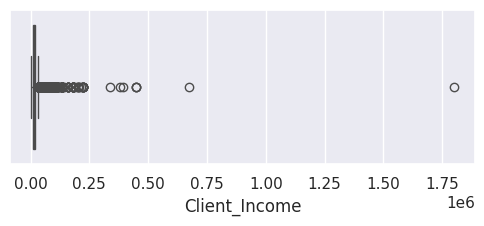

In [58]:
# Draw the boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Client_Income'])
plt.show()

In [59]:
# Step 1: Convert empty strings and cells with only `$` to NaN
df['Credit_Amount'] = df['Credit_Amount'].replace({'': pd.NA, '$': pd.NA})

# Step 2: Remove dollar signs and commas from valid numeric values
df['Credit_Amount'] = df['Credit_Amount'].replace({'\$': '', ',': ''}, regex=True)

# Step 3: Convert the column to numeric
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')

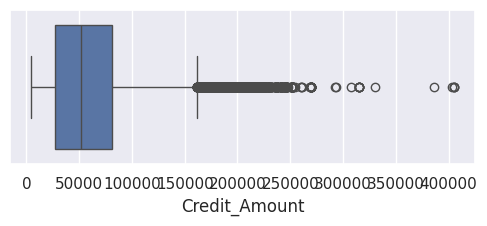

In [60]:
# Draw the boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Credit_Amount'])
plt.show()

In [61]:
# Step 1: Convert empty strings and cells with only `$` to NaN
df['Loan_Annuity'] = df['Loan_Annuity'].replace({'': pd.NA, '$': pd.NA, '#VALUE!':pd.NA})

# Step 2: Remove dollar signs and commas from valid numeric values
df['Loan_Annuity'] = df['Loan_Annuity'].replace({'\$': '', ',': ''}, regex=True)

# Step 3: Convert the column to numeric
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')

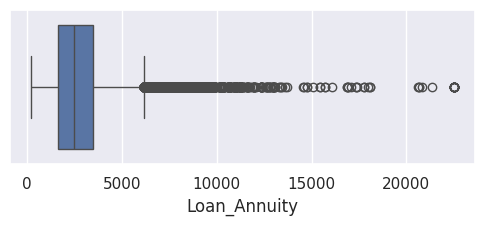

In [62]:
# Draw the boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Loan_Annuity'])
plt.show()

In [63]:
# Convert blanks to NaN for specified columns
columns_to_clean = ['Bike_Owned', 'Car_Owned', 'Active_Loan', 'House_Own']
df[columns_to_clean] = df[columns_to_clean].replace('', pd.NA)

In [64]:
# Replace 'NA' and blanks with NaN in the Child_Count column
df['Child_Count'] = df['Child_Count'].replace(['NA', ''], pd.NA)

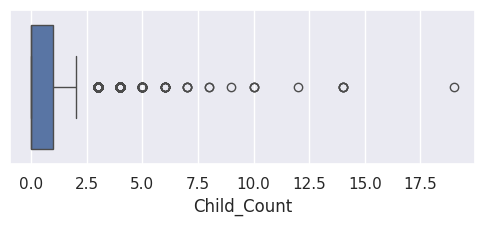

In [65]:
# Draw the boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['Child_Count'])
plt.show()

In [66]:
# Convert Age_Days and Employed_Days to years and round to nearest integer
df['Age_Years'] = (df['Age_Days'] / 365).round().astype('Int64')  # Keep as Int64 to handle NaN
df['Employed_Years'] = (df['Employed_Days'] / 365).round().astype('Int64')  # Same here

# Drop the original columns if no longer needed (optional)
df.drop(columns=['Age_Days', 'Employed_Days'], inplace=True)

In [67]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                    3622    2.972361
Car_Owned                        3581    2.938715
Bike_Owned                       3624    2.974002
Active_Loan                      3635    2.983029
House_Own                        3661    3.004366
Child_Count                      3638    2.985491
Credit_Amount                    3637    2.984670
Loan_Annuity                     4826    3.960412
Client_Income_Type               3701    3.037191
Client_Education                 3645    2.991236
Client_Marital_Status            3473    2.850085
Client_Gender                    2413    1.980206
Loan_Contract_Type               3651    2.996159
Workphone_Working                   0    0.000000
Client_Family_Members            2410    1.977744
Default                             0    0.000000
Age_Years                        3617    2.968258
Employed_Years                   3666    3.008469


In [68]:
# Fill null values with the median for specific columns
df['Client_Income'].fillna(df['Client_Income'].median(), inplace=True)
df['Child_Count'].fillna(df['Child_Count'].median(), inplace=True)
df['Credit_Amount'].fillna(df['Credit_Amount'].median(), inplace=True)
df['Loan_Annuity'].fillna(df['Loan_Annuity'].median(), inplace=True)
df['Client_Family_Members'].fillna(df['Client_Family_Members'].median(), inplace=True)
df['Age_Years'].fillna(df['Age_Years'].median(), inplace=True)
df['Employed_Years'].fillna(df['Employed_Years'].median(), inplace=True)

In [69]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                       0    0.000000
Car_Owned                        3581    2.938715
Bike_Owned                       3624    2.974002
Active_Loan                      3635    2.983029
House_Own                        3661    3.004366
Child_Count                         0    0.000000
Credit_Amount                       0    0.000000
Loan_Annuity                        0    0.000000
Client_Income_Type               3701    3.037191
Client_Education                 3645    2.991236
Client_Marital_Status            3473    2.850085
Client_Gender                    2413    1.980206
Loan_Contract_Type               3651    2.996159
Workphone_Working                   0    0.000000
Client_Family_Members               0    0.000000
Default                             0    0.000000
Age_Years                           0    0.000000
Employed_Years                      0    0.000000


In [70]:
# Replace 'NA' and blanks with NaN in the Child_Count column
df['Client_Gender'] = df['Client_Gender'].replace(['XNA', ''], pd.NA)

In [71]:
# List of categorical columns to fill with mode
categorical_columns = [
    'Client_Income_Type',
    'Client_Education',
    'Client_Marital_Status',
    'Client_Gender',
    'Loan_Contract_Type'
]

# Fill missing values with the mode for each column
for column in categorical_columns:
    mode_value = df[column].mode()[0]  # Get the mode
    df[column].fillna(mode_value, inplace=True)  # Fill blanks with the mode

In [72]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                       0    0.000000
Car_Owned                        3581    2.938715
Bike_Owned                       3624    2.974002
Active_Loan                      3635    2.983029
House_Own                        3661    3.004366
Child_Count                         0    0.000000
Credit_Amount                       0    0.000000
Loan_Annuity                        0    0.000000
Client_Income_Type                  0    0.000000
Client_Education                    0    0.000000
Client_Marital_Status               0    0.000000
Client_Gender                       0    0.000000
Loan_Contract_Type                  0    0.000000
Workphone_Working                   0    0.000000
Client_Family_Members               0    0.000000
Default                             0    0.000000
Age_Years                           0    0.000000
Employed_Years                      0    0.000000


In [73]:
binary_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own']

for column in binary_columns:
    mode_value = df[column].mode()[0]  # Get the mode
    df[column].fillna(mode_value, inplace=True)  # Fill blanks with the mode

In [74]:
# Count of missing values
nan_counts = df.isna().sum()

# Percentage of missing values
nan_percentages = (nan_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
nan_summary = pd.DataFrame({
    'Missing Values': nan_counts,
    'Percentage': nan_percentages
})

# Print the summary
print(nan_summary)

                       Missing Values  Percentage
Client_Income                       0         0.0
Car_Owned                           0         0.0
Bike_Owned                          0         0.0
Active_Loan                         0         0.0
House_Own                           0         0.0
Child_Count                         0         0.0
Credit_Amount                       0         0.0
Loan_Annuity                        0         0.0
Client_Income_Type                  0         0.0
Client_Education                    0         0.0
Client_Marital_Status               0         0.0
Client_Gender                       0         0.0
Loan_Contract_Type                  0         0.0
Workphone_Working                   0         0.0
Client_Family_Members               0         0.0
Default                             0         0.0
Age_Years                           0         0.0
Employed_Years                      0         0.0


In [75]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 8873


In [76]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Workphone_Working,Client_Family_Members,Default,Age_Years,Employed_Years
0,6750.0,0,0,1,0,0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,0,2,0,38,3
1,20250.0,1,0,1,1,0,15282.00,1826.55,Service,Graduation,M,Male,CL,1,2,0,39,11
2,18000.0,0,0,1,0,1,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,0,2,0,46,14
3,15750.0,0,0,1,1,0,53870.40,2295.45,Retired,Secondary,M,Male,CL,0,2,0,64,1001
4,33750.0,1,0,1,0,2,133988.40,3547.35,Commercial,Secondary,M,Female,CL,0,4,0,31,8


In [77]:
df.tail()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Workphone_Working,Client_Family_Members,Default,Age_Years,Employed_Years
121851,29250.0,0,0,0,1,0,107820.00,3165.30,Service,Secondary,M,Female,CL,0,2,1,35,8
121852,15750.0,0,1,1,0,0,104256.00,3388.05,Commercial,Graduation,M,Female,CL,0,2,0,24,2
121853,8100.0,0,1,0,1,1,55107.90,2989.35,Govt Job,Secondary,M,Male,CL,0,3,0,25,4
121854,38250.0,1,1,0,1,0,45000.00,2719.35,Service,Graduation,M,Female,CL,0,2,0,28,2
121855,9000.0,1,1,1,1,1,62428.95,4201.65,Commercial,Secondary,S,Male,CL,0,2,0,40,1


In [78]:
# Remove outliers in 'Client_Income' using IQR
Q1 = df['Client_Income'].quantile(0.25)
Q3 = df['Client_Income'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Client_Income'] < (Q1 - 1.5 * IQR)) | (df['Client_Income'] > (Q3 + 1.5 * IQR)))]

In [79]:
# Remove outliers in 'Credit_Amount' using IQR
Q1 = df['Credit_Amount'].quantile(0.25)
Q3 = df['Credit_Amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Credit_Amount'] < (Q1 - 1.5 * IQR)) | (df['Credit_Amount'] > (Q3 + 1.5 * IQR)))]

In [80]:
# Remove outliers in 'Loan_Annuity' using IQR
Q1 = df['Loan_Annuity'].quantile(0.25)
Q3 = df['Loan_Annuity'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Loan_Annuity'] < (Q1 - 1.5 * IQR)) | (df['Loan_Annuity'] > (Q3 + 1.5 * IQR)))]

In [81]:
# Remove outliers in 'Client_Family_Members' using IQR
Q1 = df['Client_Family_Members'].quantile(0.25)
Q3 = df['Client_Family_Members'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Client_Family_Members'] < (Q1 - 1.5 * IQR)) | (df['Client_Family_Members'] > (Q3 + 1.5 * IQR)))]

In [82]:
# Remove outliers in 'Age_Years' using IQR
Q1 = df['Age_Years'].quantile(0.25)
Q3 = df['Age_Years'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age_Years'] < (Q1 - 1.5 * IQR)) | (df['Age_Years'] > (Q3 + 1.5 * IQR)))]

In [83]:
# Remove outliers in 'Employed_Years ' using IQR
Q1 = df['Employed_Years'].quantile(0.25)
Q3 = df['Employed_Years'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Employed_Years'] < (Q1 - 1.5 * IQR)) | (df['Employed_Years'] > (Q3 + 1.5 * IQR)))]

In [84]:
df.shape

(89954, 18)

In [85]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 6495


In [86]:
# Count the occurrences where Child_Count is greater than Client_Family_Members
total_occurrences = (df['Child_Count'] > df['Client_Family_Members']).sum()

# Print the total number of occurrences
print("Total occurrences where Child_Count > Client_Family_Members:", total_occurrences)

# Remove the rows where Child_Count is greater than Client_Family_Members
df = df[df['Child_Count'] <= df['Client_Family_Members']]

# Verify that the rows have been removed
print("Rows after removal:", df.shape[0])

Total occurrences where Child_Count > Client_Family_Members: 37
Rows after removal: 89917


In [87]:
# Count the occurrences where Employed_Years is greater than Age_Years
total_occurrences_employed = (df['Employed_Years'] > df['Age_Years']).sum()
print("Total occurrences where Employed_Years > Age_Years:", total_occurrences_employed)

# Remove the rows where Employed_Years is greater than Age_Years
df = df[df['Employed_Years'] <= df['Age_Years']]

# Verify that the rows have been removed
print("Rows after removal:", df.shape[0])

Total occurrences where Employed_Years > Age_Years: 0
Rows after removal: 89917


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89917 entries, 0 to 121855
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Income          89917 non-null  float64
 1   Car_Owned              89917 non-null  Int64  
 2   Bike_Owned             89917 non-null  Int64  
 3   Active_Loan            89917 non-null  Int64  
 4   House_Own              89917 non-null  Int64  
 5   Child_Count            89917 non-null  Int64  
 6   Credit_Amount          89917 non-null  float64
 7   Loan_Annuity           89917 non-null  float64
 8   Client_Income_Type     89917 non-null  object 
 9   Client_Education       89917 non-null  object 
 10  Client_Marital_Status  89917 non-null  object 
 11  Client_Gender          89917 non-null  object 
 12  Loan_Contract_Type     89917 non-null  object 
 13  Workphone_Working      89917 non-null  int64  
 14  Client_Family_Members  89917 non-null  Int64  
 15  Defaul

In [89]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicates again to confirm removal
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

Number of duplicate rows after removal: 0


In [90]:
df.shape

(83422, 18)

In [91]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Workphone_Working,Client_Family_Members,Default,Age_Years,Employed_Years
0,6750.0,0,0,1,0,0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,0,2,0,38,3
1,20250.0,1,0,1,1,0,15282.00,1826.55,Service,Graduation,M,Male,CL,1,2,0,39,11
2,18000.0,0,0,1,0,1,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,0,2,0,46,14
4,33750.0,1,0,1,0,2,133988.40,3547.35,Commercial,Secondary,M,Female,CL,0,4,0,31,8
5,11250.0,0,1,1,1,1,13752.00,653.85,Service,Secondary,W,Female,CL,0,2,0,38,3


In [92]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-hot encoding
df = pd.get_dummies(df, columns=['Client_Income_Type', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type'], drop_first=False)

# Label encoding for Client_Education
label_encoder = LabelEncoder()
df['Client_Education'] = label_encoder.fit_transform(df['Client_Education'])

# Convert boolean columns to 1 and 0 if necessary (for completeness)
boolean_columns = df.select_dtypes(include='bool').columns  # Select boolean columns
df[boolean_columns] = df[boolean_columns].astype(int)

# Check the result
print(df.head())

   Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0         6750.0          0           0            1          0            0   
1        20250.0          1           0            1          1            0   
2        18000.0          0           0            1          0            1   
4        33750.0          1           0            1          0            2   
5        11250.0          0           1            1          1            1   

   Credit_Amount  Loan_Annuity  Client_Education  Workphone_Working  \
0       61190.55       3416.85                 4                  0   
1       15282.00       1826.55                 0                  1   
2       59527.35       2788.20                 1                  0   
4      133988.40       3547.35                 4                  0   
5       13752.00        653.85                 4                  0   

   Client_Family_Members  Default  Age_Years  Employed_Years  \
0                      2    

In [93]:
print(df.describe(include='all'))

       Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
count   83422.000000    83422.0     83422.0      83422.0    83422.0   
mean    15632.309011   0.348265    0.322613     0.482798   0.687349   
std      6118.788492   0.476423    0.467479     0.499707   0.463576   
min      2565.000000        0.0         0.0          0.0        0.0   
25%     11250.000000        0.0         0.0          0.0        0.0   
50%     14400.000000        0.0         0.0          0.0        1.0   
75%     19350.000000        1.0         1.0          1.0        1.0   
max     33750.000000        1.0         1.0          1.0        1.0   

       Child_Count  Credit_Amount  Loan_Annuity  Client_Education  \
count      83422.0   83422.000000  83422.000000      83422.000000   
mean      0.440867   55387.792809   2537.300462          2.928712   
std       0.676447   33343.197965   1108.039882          1.728282   
min            0.0    4500.000000    218.700000          0.000000   
25%            

In [94]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                    Client_Income  Car_Owned  Bike_Owned  \
Client_Income                            1.000000   0.173319   -0.004209   
Car_Owned                                0.173319   1.000000    0.003775   
Bike_Owned                              -0.004209   0.003775    1.000000   
Active_Loan                              0.003257   0.000416    0.000177   
House_Own                                0.019771   0.004856    0.001128   
Child_Count                             -0.020183   0.062694    0.005191   
Credit_Amount                            0.309832   0.067211    0.003142   
Loan_Annuity                             0.377309   0.090762   -0.003745   
Client_Education                        -0.172856  -0.051652    0.005751   
Workphone_Working                       -0.012203  -0.012074   -0.007371   
Client_Family_Members                   -0.021456   0.107448    0.006419   
Default                                 -0.023122  -0.030179    0.00

<Axes: >

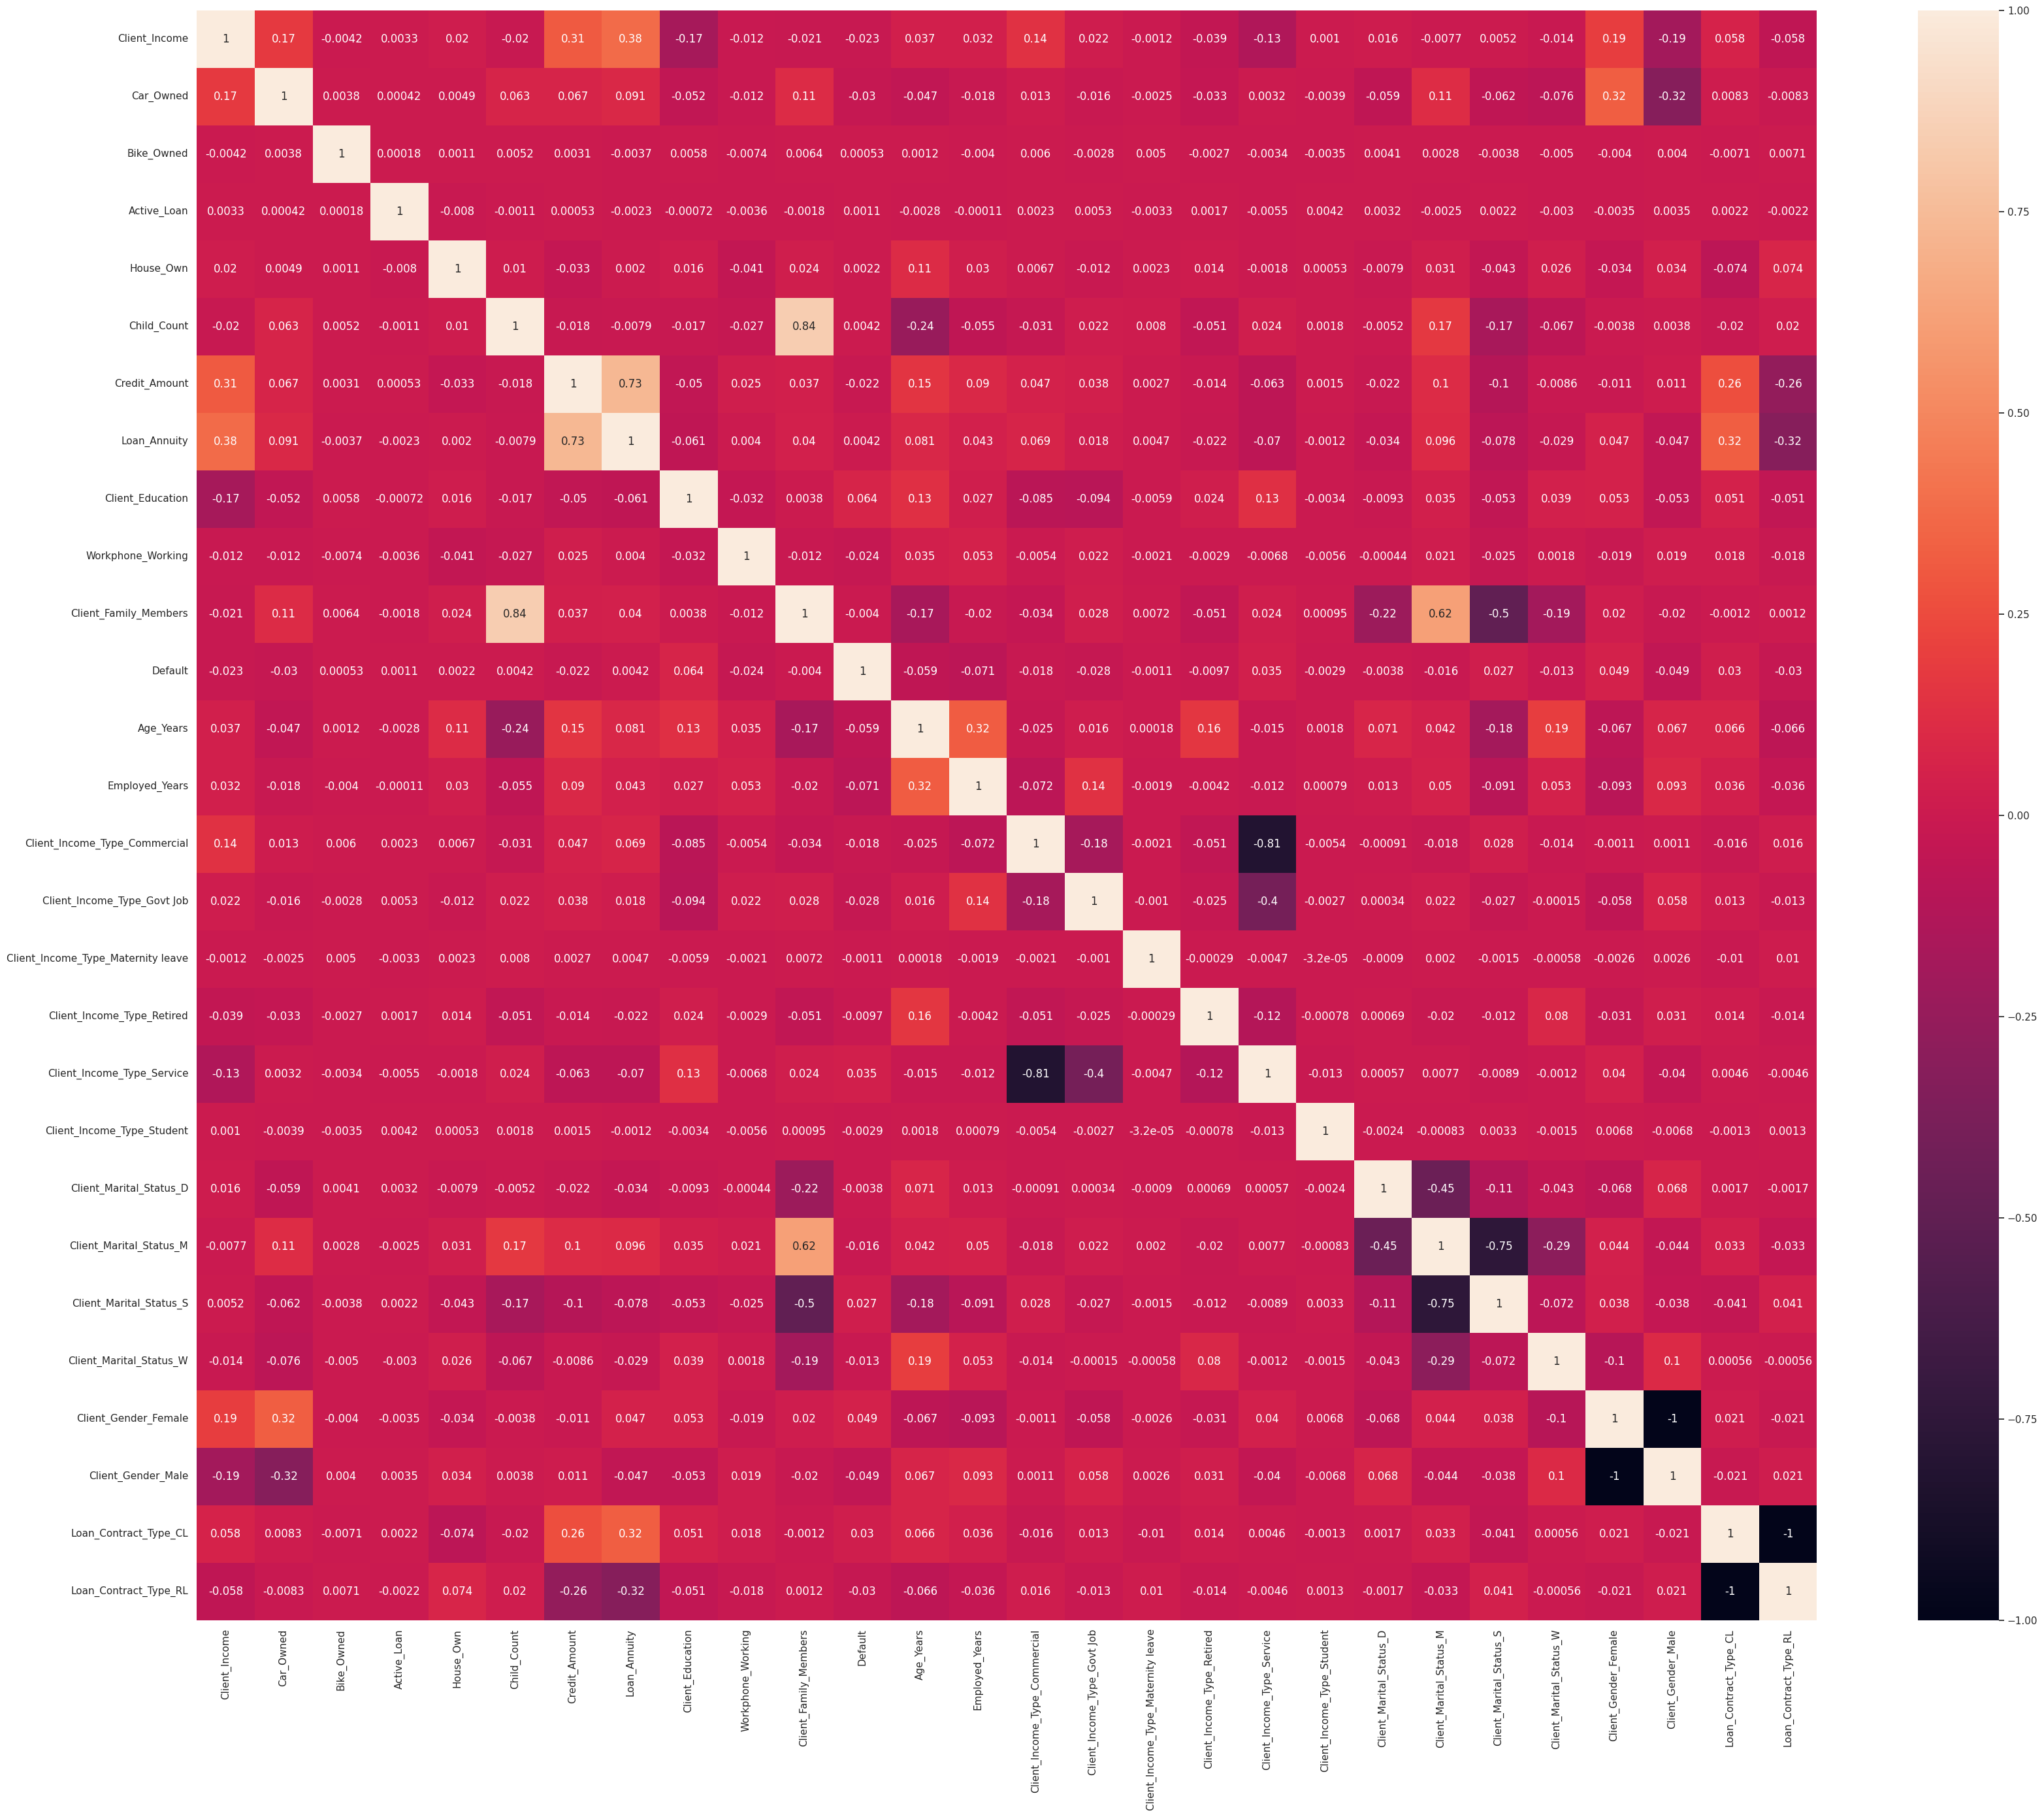

In [95]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [96]:
import pandas as pd

# Your correlation matrix (assuming it's stored in a DataFrame)
correlation_matrix = df.corr()

# Define the correlation threshold (e.g., 0.7 or -0.7)
threshold = 0.8

# Create a boolean mask for significant correlations
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)  # Exclude self-correlation

# Identify columns to remove
columns_to_remove = [col for col in mask.columns if any(mask[col])]

#print the names
print(columns_to_remove)

['Child_Count', 'Client_Family_Members', 'Client_Income_Type_Commercial', 'Client_Income_Type_Service', 'Client_Gender_Female', 'Client_Gender_Male', 'Loan_Contract_Type_CL', 'Loan_Contract_Type_RL']


In [97]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [98]:
# Get class balance for the 'Default' column
class_balance = df['Default'].value_counts()

# Print the class balance
print("Class Balance:")
print(class_balance)

Class Balance:
Default
0    75998
1     7424
Name: count, dtype: int64


#Model Fitting & Prediction

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop('Default', axis=1)  # Features
y = df['Default']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight={0: 1, 1: 10}, random_state=42)

#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(class_weight={0: 1, 1: 10}, random_state=42)

#from sklearn.svm import SVC
#model = SVC(class_weight={0: 1, 1: 10}, random_state=42)

#from sklearn.ensemble import GradientBoostingClassifier
#model = GradientBoostingClassifier(random_state=42)  # Gradient Boosting doesn't have a class_weight parameter

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

(66737, 27)
(16685, 27)
(66737,)
(16685,)
Accuracy: 0.8450704225352113
Confusion Matrix:
 [[13896  1304]
 [ 1281   204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     15200
           1       0.14      0.14      0.14      1485

    accuracy                           0.85     16685
   macro avg       0.53      0.53      0.53     16685
weighted avg       0.85      0.85      0.85     16685



#Run

In [100]:
!wget -q -O - ipv4.icanhazip.com

34.168.157.81


In [101]:
# Assuming you already have a trained model, save it
import joblib

# Let's say `best_model` is the model you selected
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [102]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00


In [103]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load the trained model
model = joblib.load('best_model.pkl')

# Title for your web app
st.title("Loan Default Prediction")

# Create input fields for user input
Client_Income = st.number_input("Client Income", min_value=0)
Car_Owned = st.selectbox("Car Owned", [0, 1])  # 0 = No, 1 = Yes
Bike_Owned = st.selectbox("Bike Owned", [0, 1])  # 0 = No, 1 = Yes
Active_Loan = st.selectbox("Active Loan", [0, 1])  # 0 = No, 1 = Yes
House_Own = st.selectbox("House Owned", [0, 1])  # 0 = No, 1 = Yes
Child_Count = st.number_input("Child Count", min_value=0)
Credit_Amount = st.number_input("Credit Amount", min_value=0)
Loan_Annuity = st.number_input("Loan Annuity", min_value=0)

# User inputs for categorical variables
Client_Education = st.selectbox("Client Education", ['Graduation', 'Gradudation dropout', 'Junior secondary', 'Post Grad', 'Secondary'])
Client_Income_Type = st.selectbox("Client Income Type", ['Commercial', 'Govt Job', 'Maternity leave', 'Retired', 'Service', 'Student'])
Client_Marital_Status = st.selectbox("Client Marital Status", ['D', 'M', 'S', 'W'])
Client_Gender = st.selectbox("Client Gender", ['Female', 'Male'])
Loan_Contract_Type = st.selectbox("Loan Contract Type", ['CL', 'RL'])
Workphone_Working = st.selectbox("Workphone Working", [0, 1])  # 0 = No, 1 = Yes
Client_Family_Members = st.number_input("Client Family Members", min_value=0)
Age_Years = st.number_input("Age (Years)", min_value=0)
Employed_Years = st.number_input("Employed (Years)", min_value=0)

# Define a function to map Client_Education to its label-encoded value
def encode_client_education(education):
    education_mapping = {
        'Graduation': 0,
        'Graduation dropout': 1,
        'Junior secondary': 2,
        'Post Grad': 3,
        'Secondary': 4
    }
    return education_mapping.get(education, -1)  # Return -1 if not found

# Encode categorical variables into one-hot encoding
def encode_input():
    # Map Client_Education to its label-encoded value
    education_encoded = encode_client_education(Client_Education)

    # One-hot encoding for Client_Income_Type
    income_type_encoded = [
        1 if Client_Income_Type == "Commercial" else 0,
        1 if Client_Income_Type == "Govt Job" else 0,
        1 if Client_Income_Type == "Maternity leave" else 0,
        1 if Client_Income_Type == "Retired" else 0,
        1 if Client_Income_Type == "Service" else 0,
        1 if Client_Income_Type == "Student" else 0,
    ]

    # One-hot encoding for Client_Marital_Status
    marital_status_encoded = [
        1 if Client_Marital_Status == "D" else 0,
        1 if Client_Marital_Status == "M" else 0,
        1 if Client_Marital_Status == "S" else 0,
        1 if Client_Marital_Status == "W" else 0,
    ]

    # One-hot encoding for Client_Gender
    gender_encoded = [
        1 if Client_Gender == "Female" else 0,
        1 if Client_Gender == "Male" else 0,
    ]

    # One-hot encoding for Loan_Contract_Type
    loan_contract_encoded = [
        1 if Loan_Contract_Type == "CL" else 0,
        1 if Loan_Contract_Type == "RL" else 0,
    ]

    # Combine all features into one array
    input_features = [
        Client_Income, Car_Owned, Bike_Owned, Active_Loan, House_Own, Child_Count,
        Credit_Amount, Loan_Annuity, Workphone_Working, Client_Family_Members, Age_Years, Employed_Years,
        education_encoded  # Use the label-encoded value directly
    ] + income_type_encoded + marital_status_encoded + gender_encoded + loan_contract_encoded


    return np.array(input_features).reshape(1, -1)


# Button to predict
if st.button("Predict"):
    # Preprocess input
    input_data = encode_input()

    # Predict using the model
    prediction = model.predict(input_data)

    # Display result
    if prediction[0] == 0:
        st.success("The client is predicted to NOT default on the loan.")
    else:
        st.error("The client is predicted to DEFAULT on the loan.")


Writing app.py


In [104]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.157.81:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://honest-pandas-shave.loca.lt
  Stopping...
^C
